In [1]:
import pandas as pd
import numpy as np
 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Estimacionesd.csv', encoding='latin-1',sep=';')

In [4]:
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Alpiste,1987-1988,BUENOS AIRES,GENERAL PINTO,6,351,140,130,154,1185
1,Alpiste,1988-1989,BUENOS AIRES,GENERAL PINTO,6,351,110,110,160,1455
2,Alpiste,1989-1990,BUENOS AIRES,GENERAL PINTO,6,351,100,100,130,1300
3,Avena,1987-1988,BUENOS AIRES,GENERAL PINTO,6,351,15000,2500,4250,1700
4,Avena,1989-1990,BUENOS AIRES,GENERAL PINTO,6,351,20000,4600,7000,1522
...,...,...,...,...,...,...,...,...,...,...
308,Trigo total,2017-2018,BUENOS AIRES,GENERAL PINTO,6,351,26050,25800,100620,3900
309,Trigo total,2018-2019,BUENOS AIRES,GENERAL PINTO,6,351,35125,33625,134500,4000
310,Trigo total,2019-2020,BUENOS AIRES,GENERAL PINTO,6,351,45000,43936,164760,3750
311,Trigo total,2020-2021,BUENOS AIRES,GENERAL PINTO,6,351,45300,44400,164280,3700


In [7]:
df.describe()

,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
count,313.0,313.0,313.000000,313.000000,313.000000,313.000000
mean,6.0,351.0,18131.776358,16798.587859,58930.686901,3257.450479
std,0.0,0.0,23363.095876,22593.369355,82452.020298,2021.066619
min,6.0,351.0,68.000000,0.000000,0.000000,0.000000
25%,6.0,351.0,1320.000000,600.000000,1470.000000,2100.000000
50%,6.0,351.0,10000.000000,8000.000000,22080.000000,2800.000000
75%,6.0,351.0,26050.000000,24800.000000,82000.000000,3750.000000
max,6.0,351.0,110600.000000,108400.000000,371290.000000,10300.000000


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cultivo         313 non-null    object
 1   Campaña         313 non-null    object
 2   Provincia       313 non-null    object
 3   Departamento    313 non-null    object
 4   idProvincia     313 non-null    int64 
 5   idDepartamento  313 non-null    int64 
 6   Sup. Sembrada   313 non-null    int64 
 7   Sup. Cosechada  313 non-null    int64 
 8   Producción      313 non-null    int64 
 9   Rendimiento     313 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 24.6+ KB


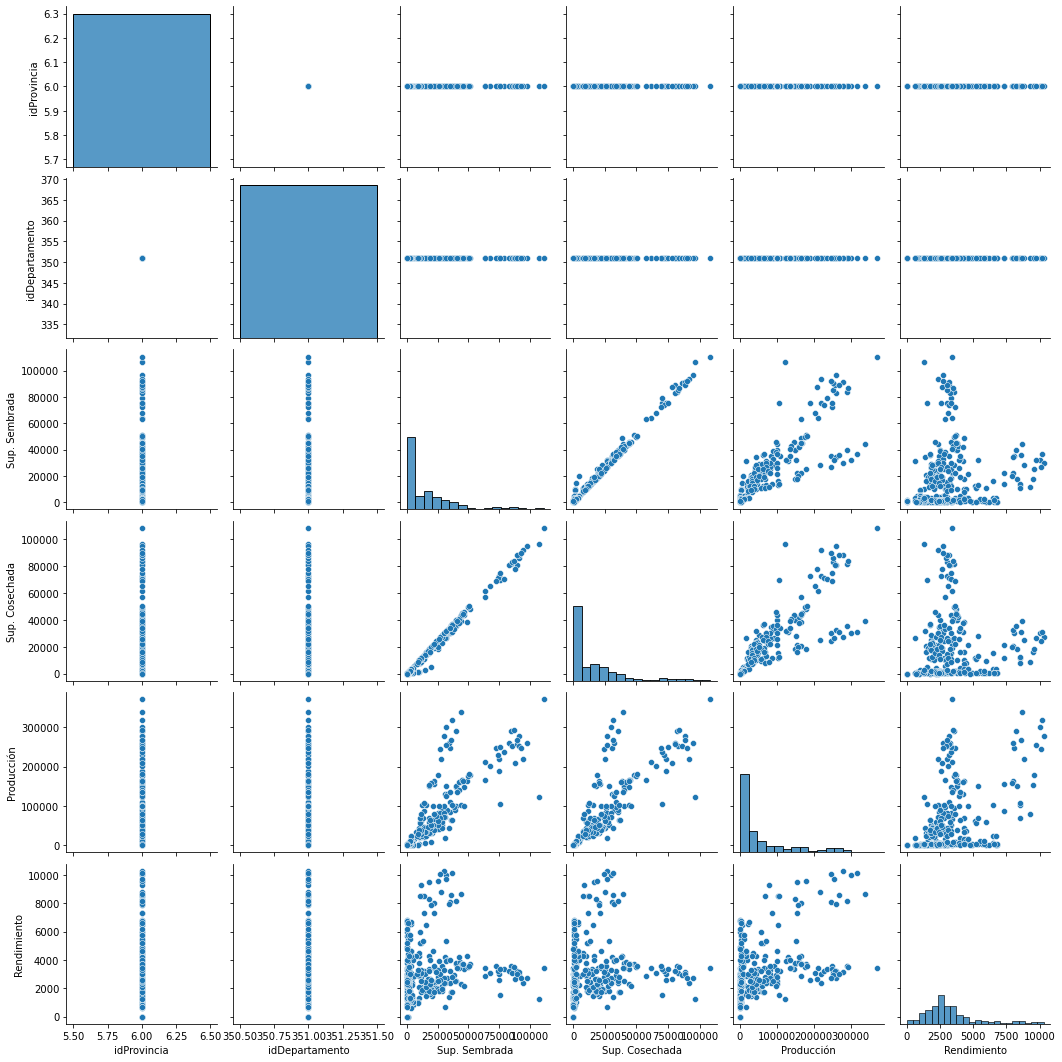

In [9]:
##Analisis multivariado - primer metrica a realizar en el multivariado - 
##1-colianilidad no afecta el modelo 
##2-pero si afecta en el procesamiento
##3-pero infla la importancia relativa de las variables,
sns.pairplot(df)

<AxesSubplot:>

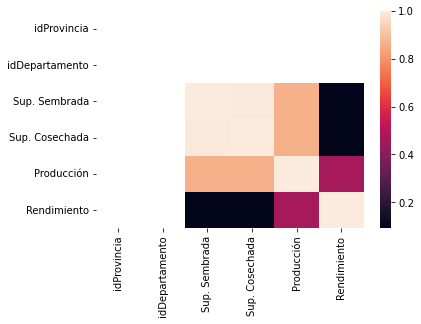

In [12]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
idProvincia,NaN,NaN,NaN,NaN,NaN,NaN
idDepartamento,NaN,NaN,NaN,NaN,NaN,NaN
Sup. Sembrada,NaN,NaN,1.000000,0.996140,0.862517,0.094135
Sup. Cosechada,NaN,NaN,0.996140,1.000000,0.859645,0.092502
Producción,NaN,NaN,0.862517,0.859645,1.000000,0.467422
Rendimiento,NaN,NaN,0.094135,0.092502,0.467422,1.000000


In [25]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap"bwr_r",linewidths=.4) ## se vio la correlacion -primero se corre 
##la correlación

## explorar las azules y las rojos que son los extremos en correlacion para ver si hay que eliminar



SyntaxError: positional argument follows keyword argument (Temp/ipykernel_12352/1971890163.py, line 3)

<AxesSubplot:>

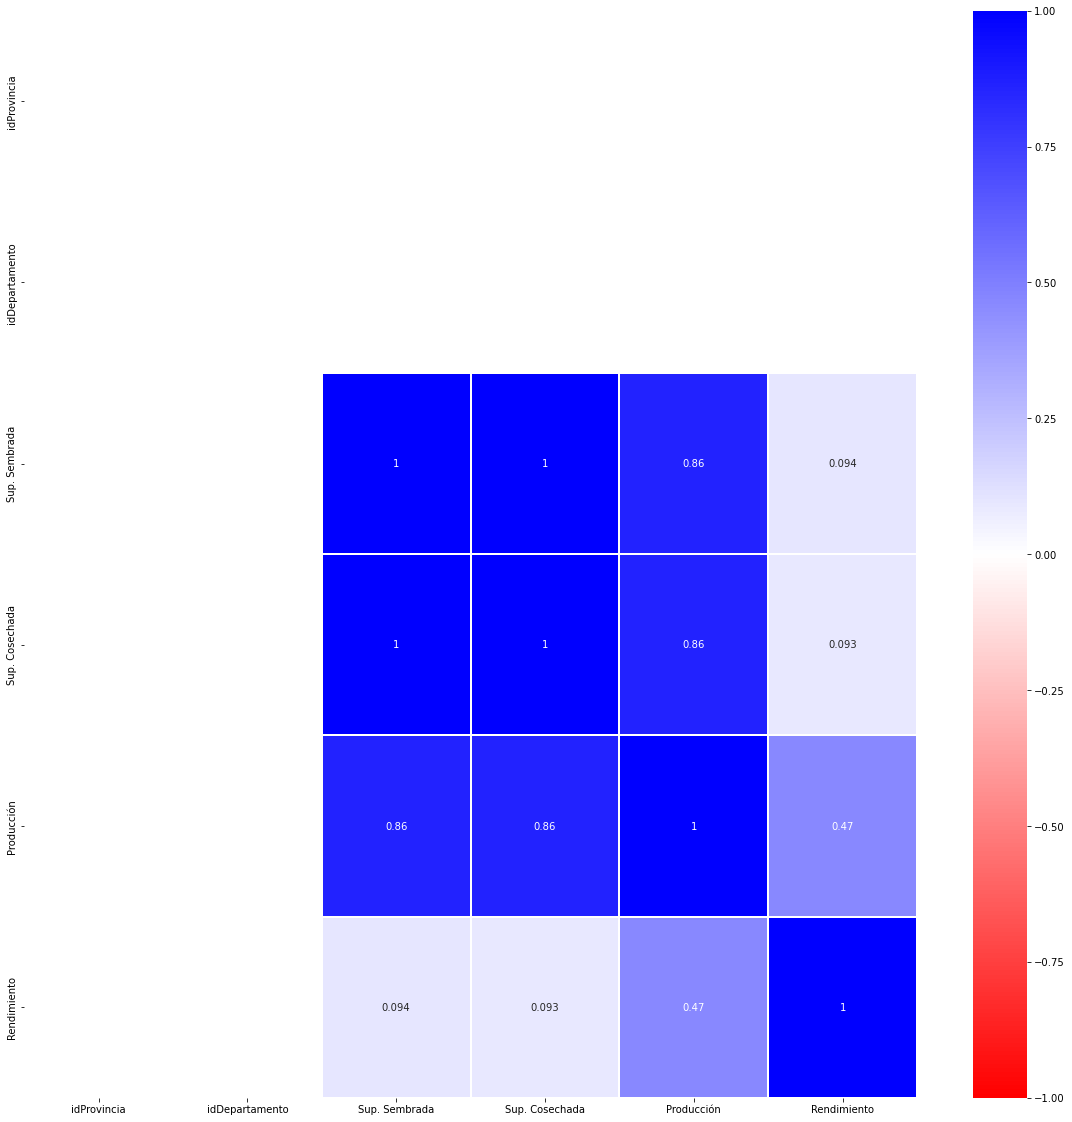

In [30]:
plt.figure(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="bwr_r",linewidths=.4)

In [ ]:
##variables categoricas
sns.scaretplot


In [41]:
sns.relplot(data=df, x='Producción', y='Sup. Sembrada', hue='Cultivo',kind='scatter', col='housing')##la variable Housing no es tan relevante si da 
## la misma grafica, si lo tiene una diferencia dice los positivos, los negativos y los valores que no estan col_wrap
##sns.relplot(data=df, x='euribor3m', y = 'nr.employed',hue='job', kind = 'scatter', col = 'housing')



ValueError: Could not interpret value `housing` for parameter `col`

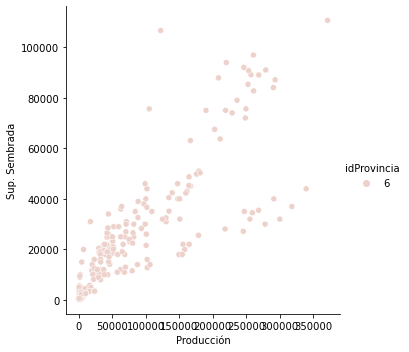

In [40]:
sns.relplot(data=df, x='Producción', y='Sup. Sembrada',hue='idProvincia',kind='scatter')

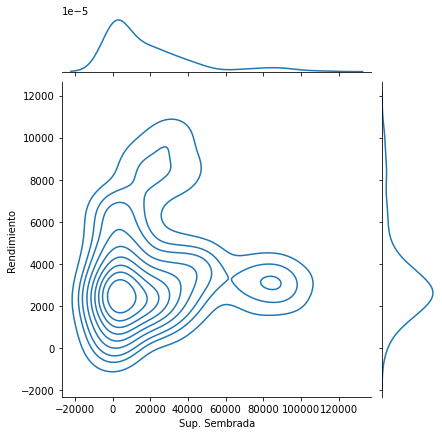

In [44]:
sns.jointplot(data=df,x='Sup. Sembrada', y='Rendimiento',kind="kde") ## variables numericas, la info que brinda es el ploteo de dos variables
##combina un barblot y scatterblot ver nombre ver los numeros - alta correlacion - una variable no categorica te permite
## ver los sesgos  , luego agregamos kind="kde"  Kernel densitid entenet donde es mas probable que encuentres un futuro registro
##curva de nuvel, mas probable que encuentres data
##puede existir una distribucion bimodal que puede estar entre outliers o datos bimodal
##buscar los datos bimodal

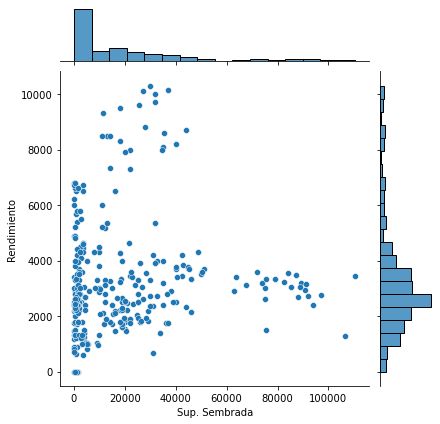

In [46]:
sns.jointplot(data=df,x='Sup. Sembrada', y='Rendimiento')

ValueError: Could not interpret value `housing` for parameter `hue`

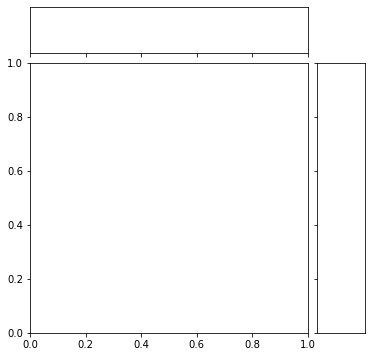

In [49]:
sns.jointplot(data=df,x='Sup. Sembrada', y='Rendimiento',kind="kde", hue='housing')
##housing no es relevante porque esta en los puntos de representacion de lo que algun valor categorico sean diferentes

ValueError: Could not interpret value `marital` for parameter `hue`

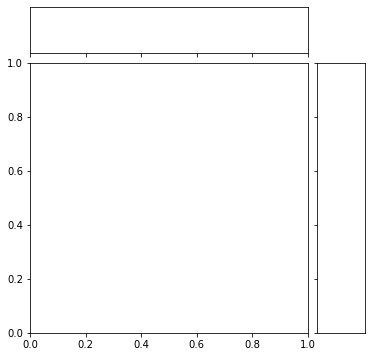

In [50]:
sns.jointplot(data=df,x='Sup. Sembrada', y='Rendimiento',kind="kde", hue='marital')